# Handwritten digit Neural Nework recognition 

In [70]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib inline
# Neural Network Class defination
class neuralNetwork: #initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes= inputnodes
        self.hnodes= hiddennodes
        self.onodes=outputnodes
        self.lr=learningrate
        #link Weight matrices wih and who
        #weights inside the array are w_i_j where link is from i to j in the next layer 
        # w11 w21
        # w21 w22
        self.wih=np.random.normal(0.0, pow(self.hnodes, -0.5),(self.hnodes, self.inodes))
        self.who=np.random.normal(0.0, pow(self.onodes, -0.5),(self.onodes, self.hnodes))
        # Acivation funstion which is nothing but sigmod funsction for when neuron should activate
        self.activation_function=lambda x: sp.expit(x)
        pass
    
    def train(self, inputs_list, targets_list): #train the neural network
        # Conver input and target array into 2D 
        inputs=np.array(inputs_list, ndmin=2).T
        targets=np.array(targets_list, ndmin=2).T
        #Calculate the signal into hidden layer
        hidden_inputs=np.dot(self.wih, inputs)
        #Calculating the signal emerging from hidden layer
        hidden_outputs=self.activation_function(hidden_inputs)
        #Calculating the signal into the final layer
        final_inputs=np.dot(self.who, hidden_outputs)
        #Calculating the final output signal
        final_outputs=self.activation_function(final_inputs)
        #output layer error is (target-actual)
        output_error=targets-final_outputs
        #Hidden layer is the output_errors, splits by weights, recombined at the hidden nodes,
        hidden_error= np.dot(self. who.T, output_error)
        # Update the weights between hidden and output layer
        self.who += self.lr*np.dot((output_error*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        # update the weights between input and hidden l;ayer
        self.wih += self.lr*np.dot((hidden_error*hidden_outputs*(1.0-hidden_outputs)),(np.transpose(inputs)))
        pass
    
    def query(self, inputs_list): #Query the neural network
        #Convert I/p list to 2D array
        inputs=np.array(inputs_list, ndmin=2).T
        #Calculate Hidden_inputs
        hidden_inputs=np.dot(self.wih, inputs)
        #Calculate O/P of hidden layer
        hidden_outputs=self.activation_function(hidden_inputs)
        #Calculate I/P of final layer
        final_inputs=np.dot(self.who, hidden_outputs)
        #calculating O/P of final Layer
        final_outputs=self.activation_function(final_inputs)
        return final_outputs

In [96]:
input_nodes=784
hidden_nodes=200
output_nodes=10
learning_rate=1.5
#Creating instance for neural networks
n=neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)



In [97]:
#Loding mnist data
training_data_file=open('mnist_train_100.csv', 'r')
training_data_list=training_data_file.readlines()
training_data_file.close()

In [98]:
#Training Neural Networks
# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [99]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [100]:
scorecard=[]
#Checking all the records in test data get right or wrong prediction using our Neural netowork
for record in test_data_list:
    #split the records with ','
    all_values=record.split(',')
    correct_label=int(all_values[0])
    print('correct labe: ', correct_label)
    #scale and shift the input
    input=(np.asfarray(all_values[1:])/255*0.99)+0.01
    output=n.query(input)
    #THe index of the highest value corrsponds to the label
    label=np.argmax(output)
    print(label, 'Network Answer')
    # Append Correct and incorrect to list
    if (label== correct_label):
        #Append if ans is correct
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

print(scorecard)
    
    

correct labe:  7
7 Network Answer
correct labe:  2
0 Network Answer
correct labe:  1
1 Network Answer
correct labe:  0
0 Network Answer
correct labe:  4
4 Network Answer
correct labe:  1
1 Network Answer
correct labe:  4
4 Network Answer
correct labe:  9
4 Network Answer
correct labe:  5
5 Network Answer
correct labe:  9
4 Network Answer
[1, 0, 1, 1, 1, 1, 1, 0, 1, 0]


In [102]:
#Accuracy
scorecard_array=np.asarray(scorecard)
print("Performanace= ", scorecard_array.sum()/scorecard_array.size)

Performanace=  0.7


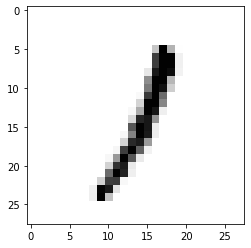

In [75]:
img_array=np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(img_array, cmap="Greys", interpolation='None')